<a href="https://colab.research.google.com/github/jaq0812/Tareas/blob/main/Sabrores_del_grupo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


df = pd.read_csv('Sabores.csv')

print(df.head())

       Marca temporal  \
0  23/7/2025 19:15:34   
1  23/7/2025 19:16:11   
2  23/7/2025 19:16:26   
3  23/7/2025 19:16:27   
4  23/7/2025 19:16:40   

  Dirías que... [¿Desayunas con pan dulce o cereal azucarado?]  \
0                                                 No             
1                                                 No             
2                                                 No             
3                                                 Sí             
4                                                 Sí             

  Dirías que... [¿Te encantan los postres?]  \
0                                        No   
1                                        No   
2                                        Sí   
3                                        No   
4                                        Sí   

  Dirías que... [¿Prefieres papas o botanas saladas como snack?]  \
0                                                 Sí               
1                                

In [6]:
# Eliminamos la primer columna ya que no la usaremos y renombramos las columnas para
# tener una mayor facilidad de manipulacion

df = df.drop(columns=['Marca temporal'])

column_mapping = {
    'Dirías que... [¿Desayunas con pan dulce o cereal azucarado?]': 'Desayuno_Dulce',
    'Dirías que... [¿Te encantan los postres?]': 'Gustan_Postres',
    'Dirías que... [¿Prefieres papas o botanas saladas como snack?]': 'Papas_Saladas',
    'Dirías que... [¿Tomas refresco o jugo con frecuencia?]': 'Refresco_Jugo',
    'Dirías que... [¿Te gustan los antojitos mexicanos (tacos, elotes, tamales)?]': 'Antojitos_Mexicanos',
    'Dirías que... [¿Sueles cocinar cosas dulces en casa?]': 'Cocinas_Dulce',
    'Dirías que... [¿Te gusta la comida muy condimentada o picante?]': 'Comida_Condimentada',
    'Dirías que... [¿Te atrae más el chocolate que las frituras?]': 'Chocolate_vs_Frituras',
    'Dirías que... [¿Te gusta más el desayuno que la cena?]': 'Desayuno_vs_Cena',
    'Dirías que... [¿Tienes golosinas guardadas en tu mochila/cajón?]': 'Golosinas_Guardadas',
    'Dirías que... [¿Pones chamoy o limón a casi todo?]': 'Chamoy_Limon',
    'Dirías que... [¿Consumes pan dulce al menos 3 veces por semana?]': 'Pan_Dulce_Frecuente',
    'Dirías que... [¿Te consideras fan de las papas o chicharrones?]': 'Fan_Papas_Chicharrones',
    'Dirías que... [¿Tomas café sin azúcar?]': 'Cafe_Sin_Azucar',
    'Dirías que... [¿Prefieres palomitas naturales sobre las acarameladas?]': 'Palomitas_Naturales',
    'Dirías que... [¿Sueles comer mientras ves series/películas?]': 'Come_Viendo_Series',
    'Piensa en lo último que comiste... era:': 'Sabor_Ultima_Comida', # Esta es la variable objetivo
    '¿Te gustan los sabores agridulces o exóticos (como salsa de tamarindo, mango & habanero, lychee, maracuyá, kombucha, kimchi, etc.)?': 'Sabores_Agridulces_Exoticos'
}

df = df.rename(columns=column_mapping)

In [7]:
df = df.drop(columns=['Cuando escuchas la palabra "comida", en qué piensas?',
                      'Cuando escuchas la palabra "postre", en qué postre piensas?'])


In [8]:
# Convertimos las variables binarias 'Si'/'No' a 1/0
binary_cols = [col for col in df.columns if col != 'Sabor_Ultima_Comida']
for col in binary_cols:
    if col in df.columns: # Verificar si la columna existe después de los drops
        df[col] = df[col].map({'Si': 1, 'No': 0})

In [9]:
# Mapeamos la variable objetivo 'Sabor_Ultima_Comida' a 0/1 (0 = Salado, 1 = Dulce)
df['Sabor_Ultima_Comida'] = df['Sabor_Ultima_Comida'].map({'Salado': 0, 'Dulce': 1})


In [10]:
# Nos aseguramos de que las columnas binarias y la objetivo sean de tipo numerico
for col in binary_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
df['Sabor_Ultima_Comida'] = pd.to_numeric(df['Sabor_Ultima_Comida'], errors='coerce')


Analisis Descriptivo Exploratorio



--- Analisis Descriptivo ---

Frecuencia de las variables de habitos alimenticios (Sa=1, No=0):

--- Desayuno_Dulce ---
Desayuno_Dulce
0.0    100.0%
Name: proportion, dtype: object

--- Gustan_Postres ---
Gustan_Postres
0.0    100.0%
Name: proportion, dtype: object

--- Papas_Saladas ---
Papas_Saladas
0.0    100.0%
Name: proportion, dtype: object

--- Refresco_Jugo ---
Refresco_Jugo
0.0    100.0%
Name: proportion, dtype: object

--- Antojitos_Mexicanos ---
Antojitos_Mexicanos
0.0    100.0%
Name: proportion, dtype: object

--- Cocinas_Dulce ---
Cocinas_Dulce
0.0    100.0%
Name: proportion, dtype: object

--- Comida_Condimentada ---
Comida_Condimentada
0.0    100.0%
Name: proportion, dtype: object

--- Chocolate_vs_Frituras ---
Chocolate_vs_Frituras
0.0    100.0%
Name: proportion, dtype: object

--- Desayuno_vs_Cena ---
Desayuno_vs_Cena
0.0    100.0%
Name: proportion, dtype: object

--- Golosinas_Guardadas ---
Golosinas_Guardadas
0.0    100.0%
Name: proportion, dtype: object

--- Chamoy

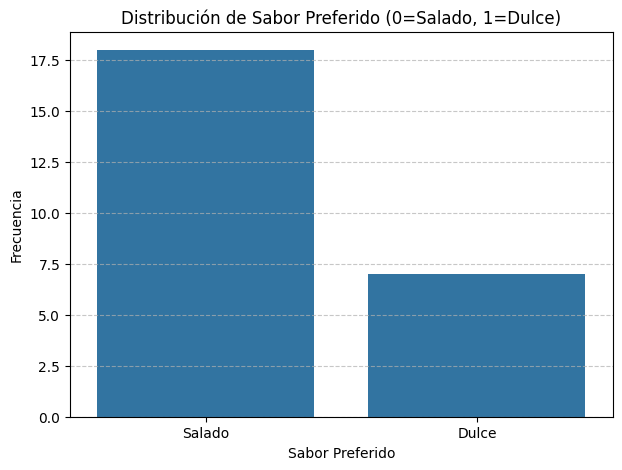

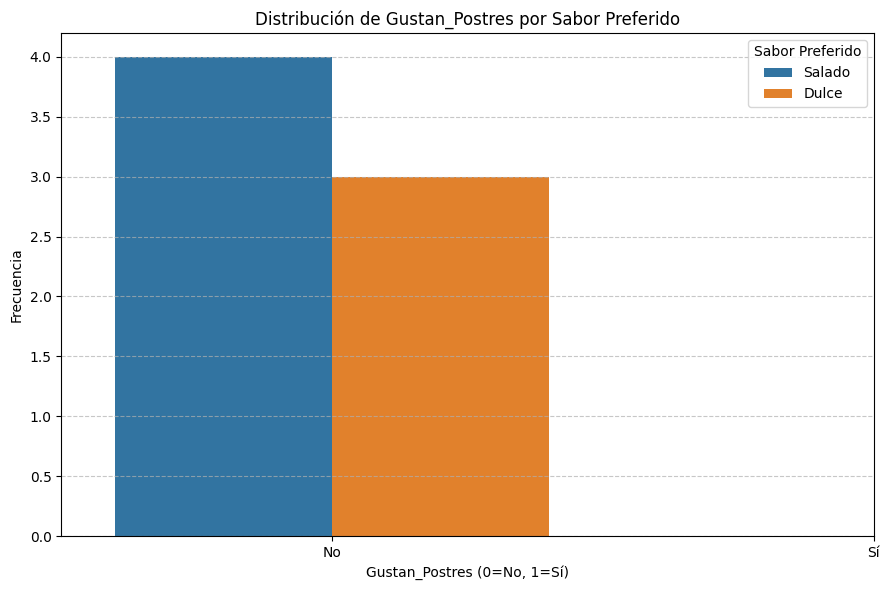

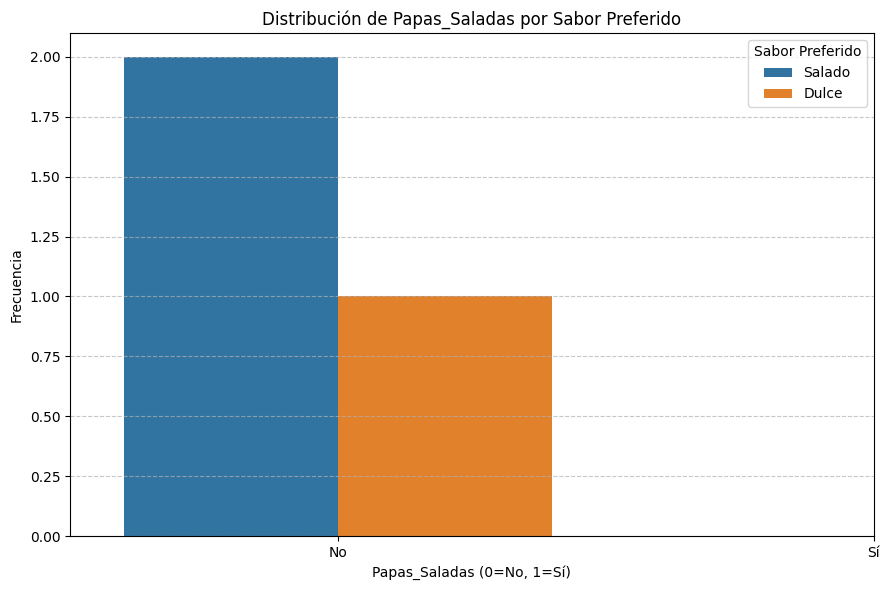

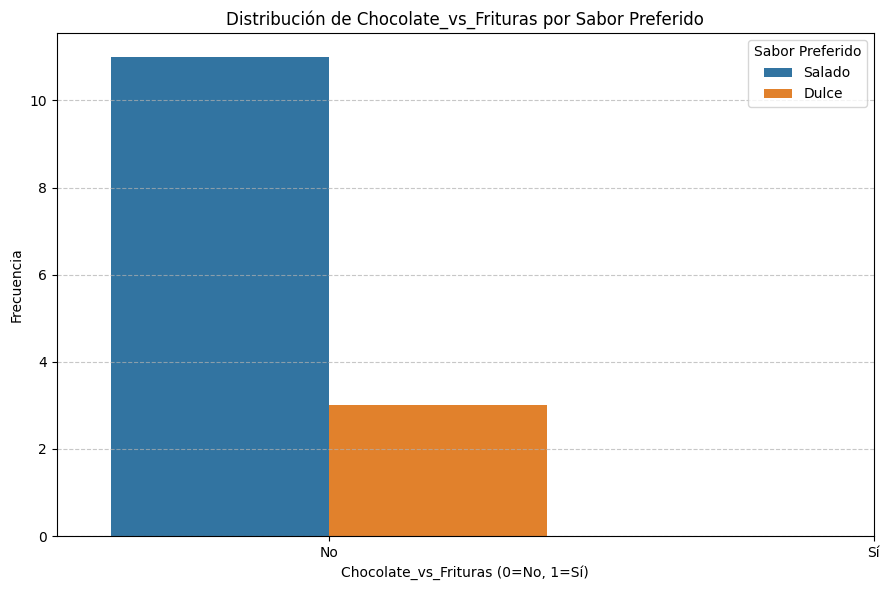

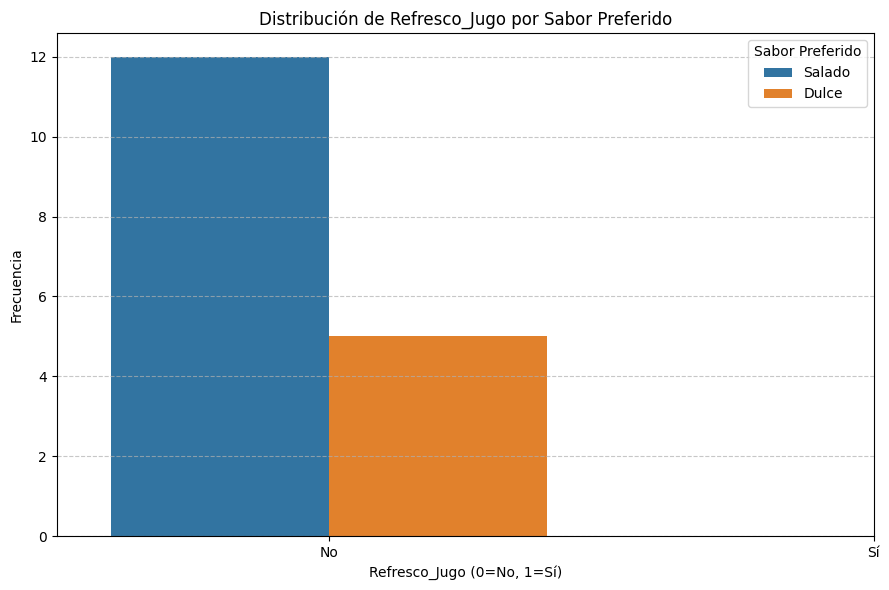

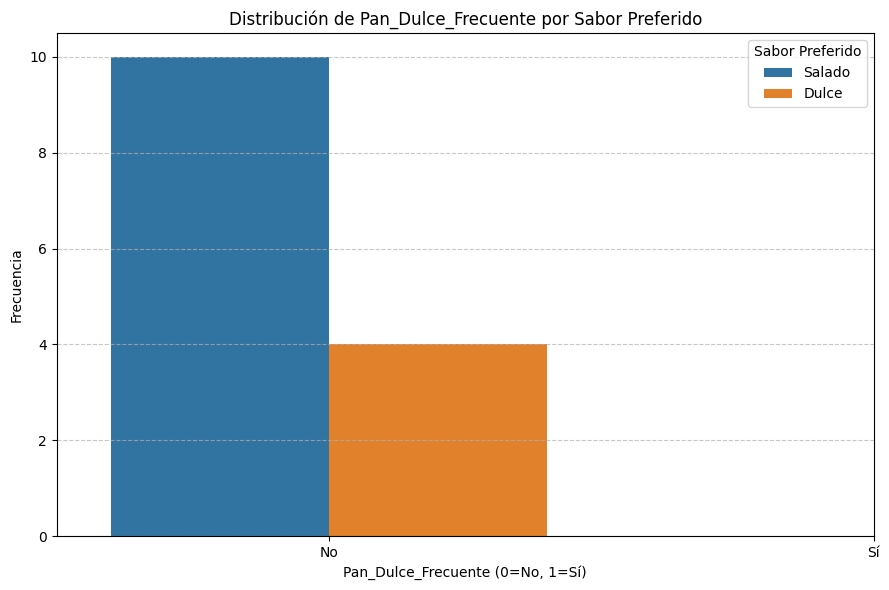

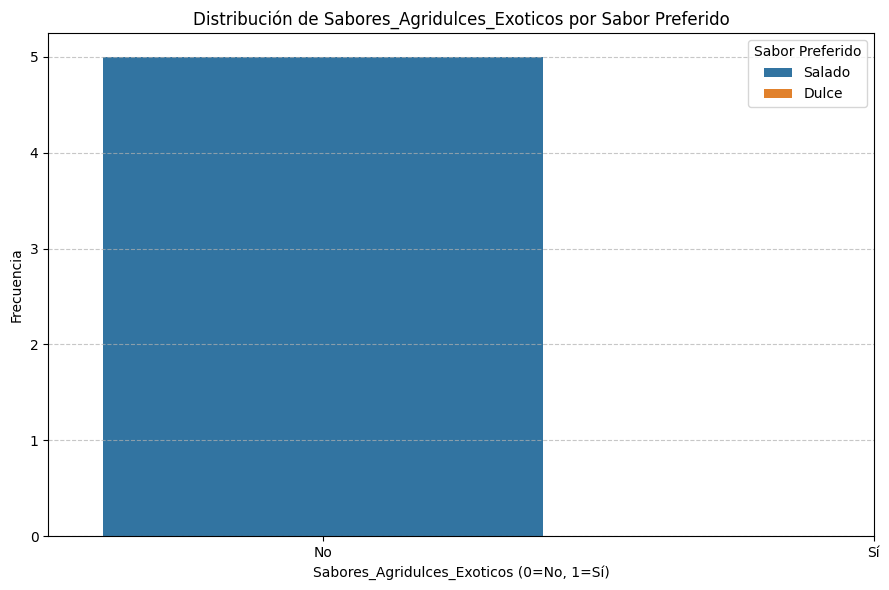

In [11]:

print("\n--- Analisis Descriptivo ---")

# Tablas de Frecuencia
print("\nFrecuencia de las variables de habitos alimenticios (Sa=1, No=0):")

binary_predictor_cols = [col for col in df.columns if col != 'Sabor_Ultima_Comida']

for col in binary_predictor_cols:
    if col in df.columns:
        print(f"\n--- {col} ---")
        print(df[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

# Frecuencia de la variable objetivo
print(f"\n--- Sabor Preferido ---")

sabor_labels = {0: 'Salado', 1: 'Dulce'}
print(df['Sabor_Ultima_Comida'].map(sabor_labels).value_counts(normalize=True).mul(100).round(2).astype(str) + '%')


# Tablas Cruzadas
print("\n--- Tablas Cruzadas ---")

print("\nTabla cruzada: Gustan_Postres vs Sabor_Ultima_Comida")
cross_tab_postres = pd.crosstab(df['Gustan_Postres'], df['Sabor_Ultima_Comida'], normalize='columns')
print(cross_tab_postres.round(4) * 100)

print("\nTabla cruzada: Papas_Saladas vs Sabor_Ultima_Comida")
cross_tab_papas = pd.crosstab(df['Papas_Saladas'], df['Sabor_Ultima_Comida'], normalize='columns')
print(cross_tab_papas.round(4) * 100)

print("\nTabla cruzada: Chocolate_vs_Frituras vs Sabor_Ultima_Comida")
cross_tab_chocolate = pd.crosstab(df['Chocolate_vs_Frituras'], df['Sabor_Ultima_Comida'], normalize='columns')
print(cross_tab_chocolate.round(4) * 100)


# Graficos de distribución y relaciones
print("\n--- Graficos ---")

# Grafico de barras para la distribución de la variable
plt.figure(figsize=(7, 5))
sns.countplot(x='Sabor_Ultima_Comida', data=df)
plt.title('Distribución de Sabor Preferido (0=Salado, 1=Dulce)')
plt.xlabel('Sabor Preferido')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1], labels=['Salado', 'Dulce'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Grafico de barras
selected_binary_cols_for_plot = [
    'Gustan_Postres',
    'Papas_Saladas',
    'Chocolate_vs_Frituras',
    'Refresco_Jugo',
    'Pan_Dulce_Frecuente',
    'Sabores_Agridulces_Exoticos'
]

for col in selected_binary_cols_for_plot:
    plt.figure(figsize=(9, 6))
    sns.countplot(x=col, hue='Sabor_Ultima_Comida', data=df)
    plt.title(f'Distribución de {col} por Sabor Preferido')
    plt.xlabel(f'{col} (0=No, 1=Sí)')
    plt.ylabel('Frecuencia')
    plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
    plt.legend(title='Sabor Preferido', labels=['Salado', 'Dulce'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Arbol de decisión

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


print("\n--- Arbol de Decisión ---")

X = df.drop(columns=['Sabor_Ultima_Comida'])
y = df['Sabor_Ultima_Comida']

# Mostrar las dimensiones de X , y
print(f"Dimensiones de las variables predictoras (X): {X.shape}")
print(f"Dimensiones de la variable objetivo (y): {y.shape}")
print("\nVariables predictoras (X) disponibles:")
print(X.columns.tolist())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nNumero de muestras en el conjunto de entrenamiento: {len(X_train)}")
print(f"Número de muestras en el conjunto de prueba: {len(X_test)}")
print(f"Distribución de 'Sabor_Ultima_Comida':\n{y_train.value_counts(normalize=True).round(2)}")
print(f"Distribución de 'Sabor_Ultima_Comida':\n{y_test.value_counts(normalize=True).round(2)}")


# modelo
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)

dt_classifier.fit(X_train, y_train)

print("\nModelo de arbol de decisión entrenado exitosamente.")


--- Arbol de Decisión ---
Dimensiones de las variables predictoras (X): (25, 17)
Dimensiones de la variable objetivo (y): (25,)

Variables predictoras (X) disponibles:
['Desayuno_Dulce', 'Gustan_Postres', 'Papas_Saladas', 'Refresco_Jugo', 'Antojitos_Mexicanos', 'Cocinas_Dulce', 'Comida_Condimentada', 'Chocolate_vs_Frituras', 'Desayuno_vs_Cena', 'Golosinas_Guardadas', 'Chamoy_Limon', 'Pan_Dulce_Frecuente', 'Fan_Papas_Chicharrones', 'Cafe_Sin_Azucar', 'Palomitas_Naturales', 'Come_Viendo_Series', 'Sabores_Agridulces_Exoticos']

Numero de muestras en el conjunto de entrenamiento: 17
Número de muestras en el conjunto de prueba: 8
Distribución de 'Sabor_Ultima_Comida':
Sabor_Ultima_Comida
0    0.71
1    0.29
Name: proportion, dtype: float64
Distribución de 'Sabor_Ultima_Comida':
Sabor_Ultima_Comida
0    0.75
1    0.25
Name: proportion, dtype: float64

Modelo de arbol de decisión entrenado exitosamente.


Visualización del arbol

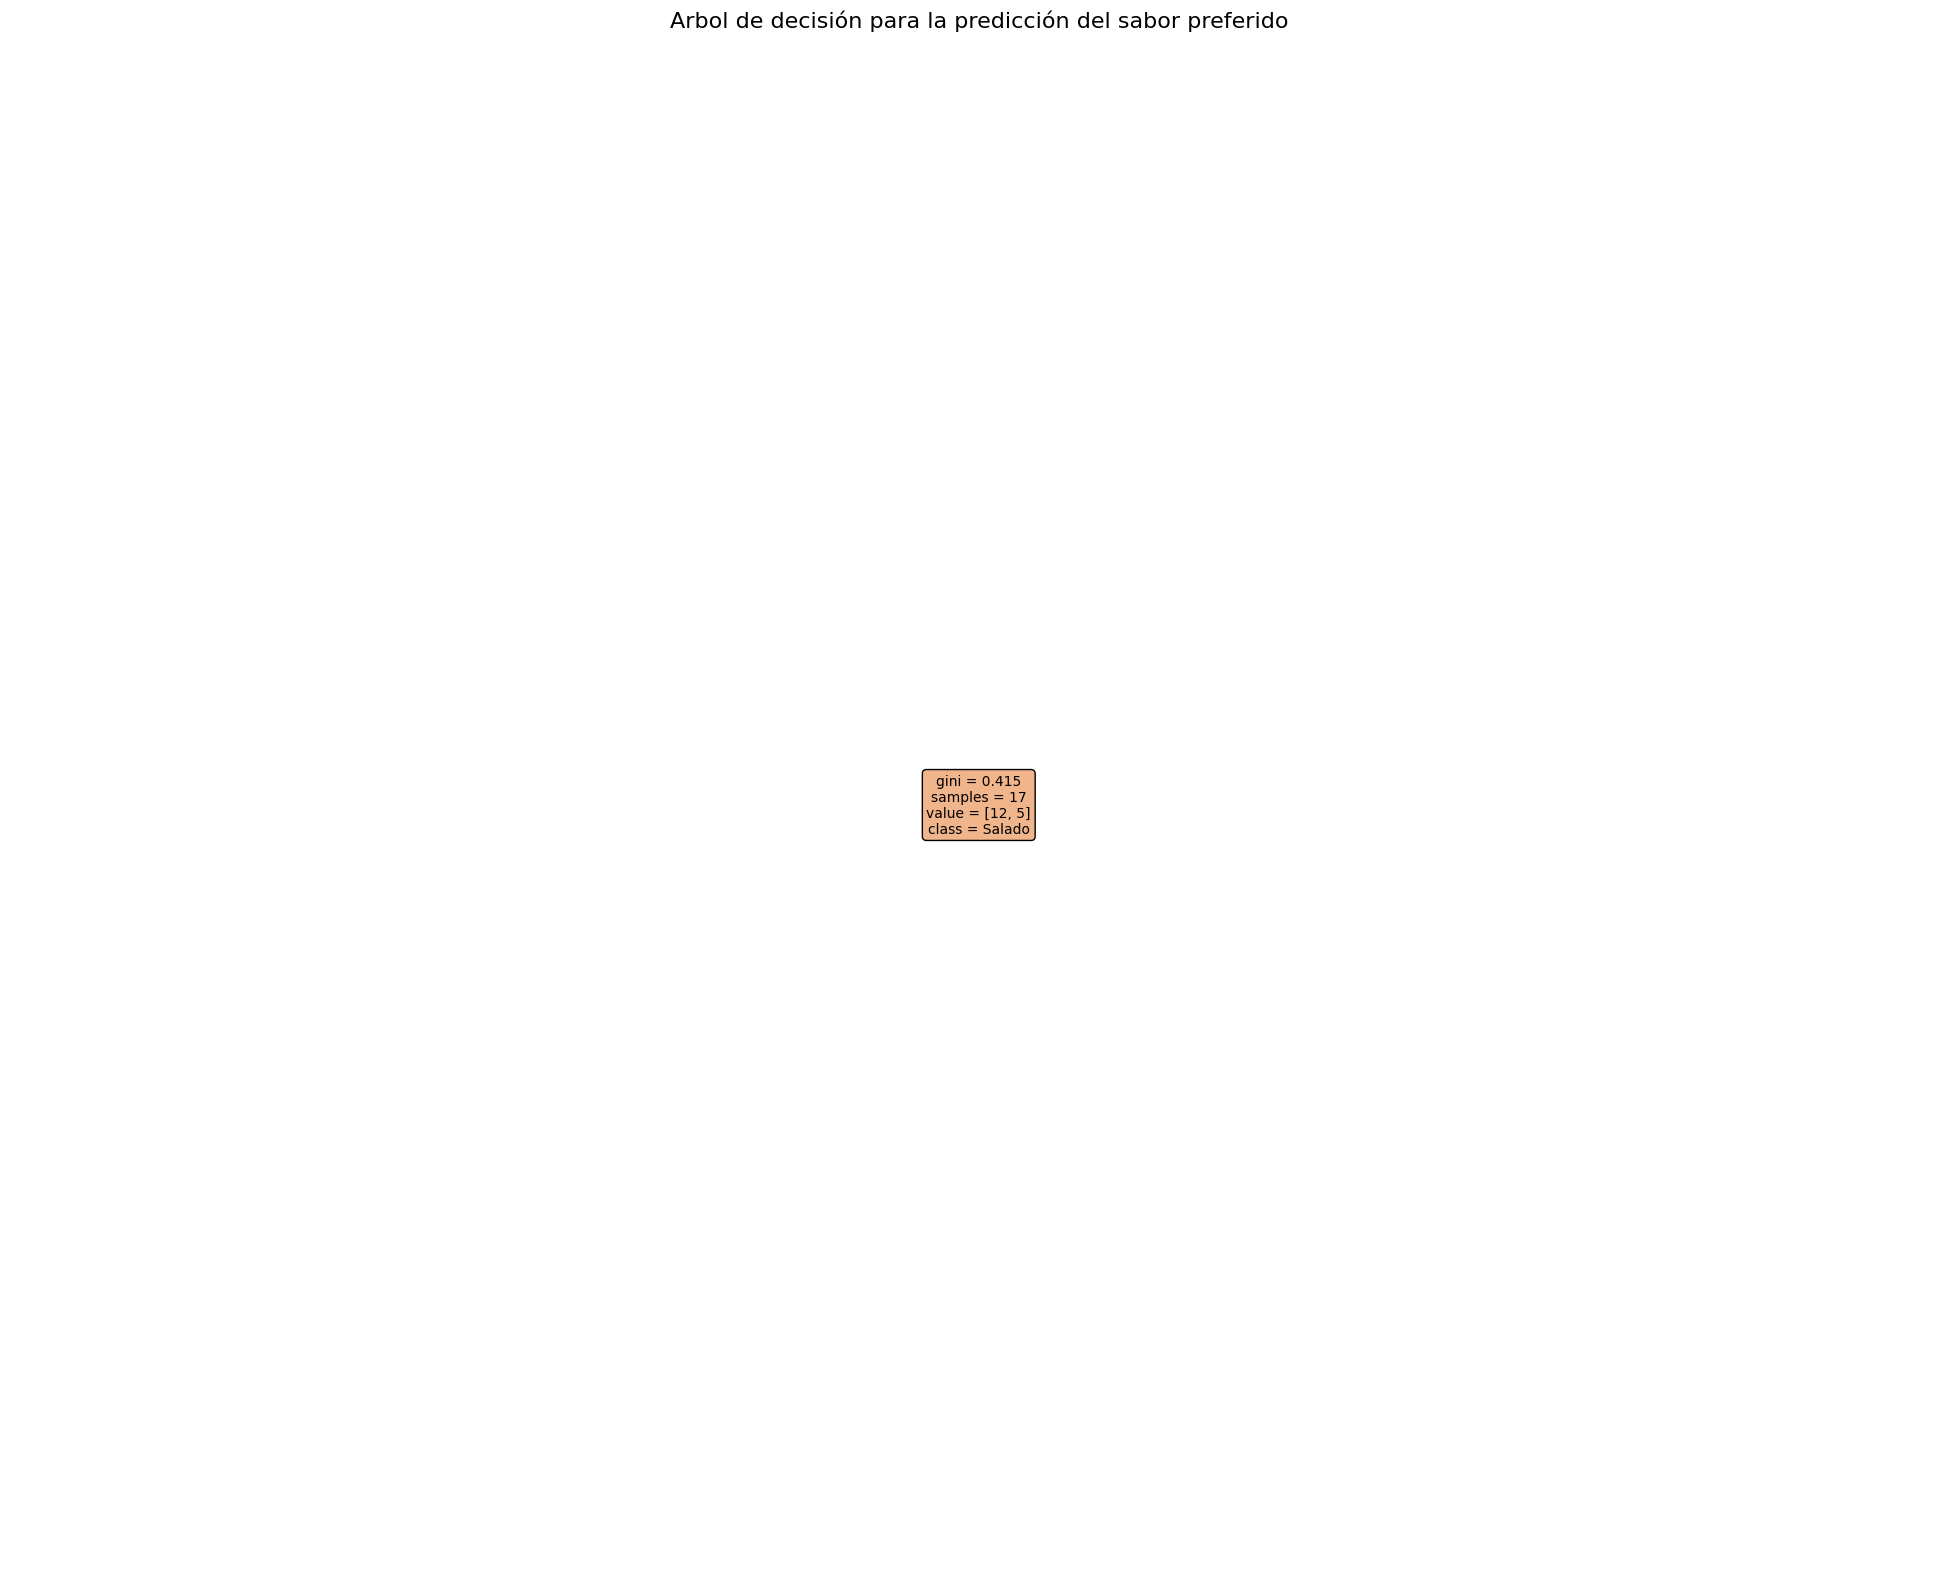


--- Evaluación del desempeño del arbol de decisión ---

Matriz de Confusión:
[[6 0]
 [2 0]]


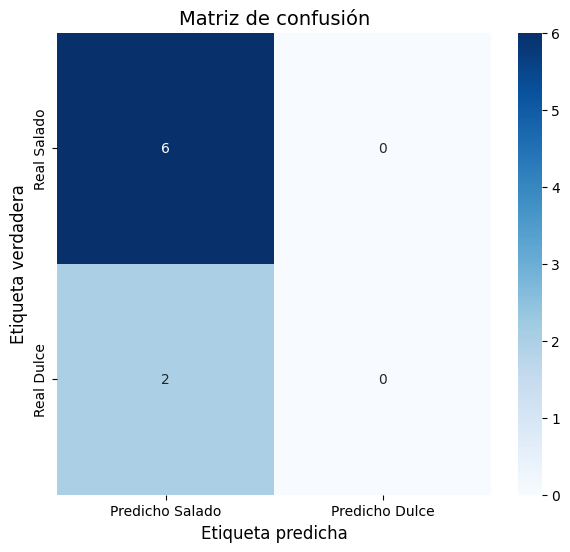


Reporte de clasificación:
              precision    recall  f1-score   support

      Salado       0.75      1.00      0.86         6
       Dulce       0.00      0.00      0.00         2

    accuracy                           0.75         8
   macro avg       0.38      0.50      0.43         8
weighted avg       0.56      0.75      0.64         8

Precisión General del Modelo: 0.7500

Importancia de las características:
                        Feature  Importance
0                Desayuno_Dulce         0.0
1                Gustan_Postres         0.0
2                 Papas_Saladas         0.0
3                 Refresco_Jugo         0.0
4           Antojitos_Mexicanos         0.0
5                 Cocinas_Dulce         0.0
6           Comida_Condimentada         0.0
7         Chocolate_vs_Frituras         0.0
8              Desayuno_vs_Cena         0.0
9           Golosinas_Guardadas         0.0
10                 Chamoy_Limon         0.0
11          Pan_Dulce_Frecuente         0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



# Visualización del arbol
plt.figure(figsize=(25, 20))
plot_tree(dt_classifier,
          feature_names=X.columns.tolist(),
          class_names=['Salado', 'Dulce'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Arbol de decisión para la predicción del sabor preferido', fontsize=16)
plt.show()


y_pred = dt_classifier.predict(X_test)

print("\n--- Evaluación del desempeño del arbol de decisión ---")

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)

# Visualización de la Matriz
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicho Salado', 'Predicho Dulce'],
            yticklabels=['Real Salado', 'Real Dulce'])
plt.title('Matriz de confusión', fontsize=14)
plt.xlabel('Etiqueta predicha', fontsize=12)
plt.ylabel('Etiqueta verdadera', fontsize=12)
plt.show()


# Reporte de Clasificación
class_report = classification_report(y_test, y_pred, target_names=['Salado', 'Dulce'])
print("\nReporte de clasificación:")
print(class_report)

# Precisión General del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión General del Modelo: {accuracy:.4f}")

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': dt_classifier.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("\nImportancia de las características:")
print(feature_importances)